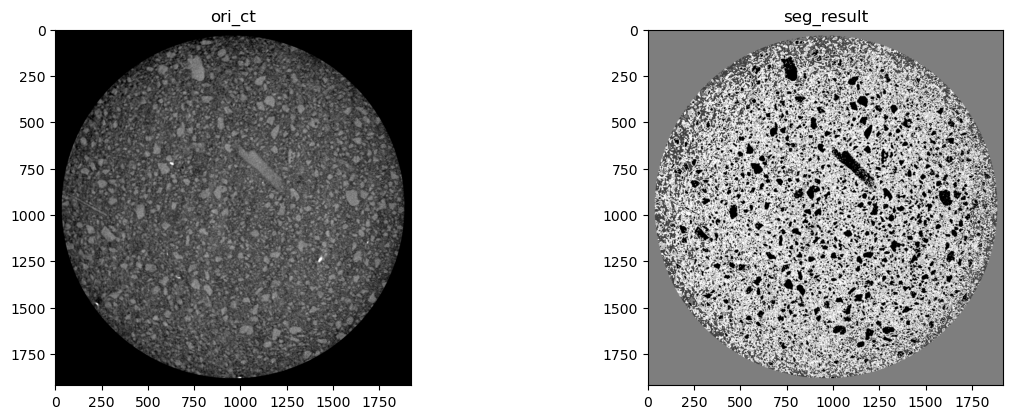

In [58]:
# 数据集制作
from utils.tools import Tools
from image_enhanced.seg_dataset_making import CementSegDatasetMaking

config = Tools.load_yaml_config("./configs/segmentation.yaml")

making_dataset = CementSegDatasetMaking(config)

making_dataset.show_seg_result()
# making_dataset.seg_cement_unhydrated_particale()

In [18]:
import cv2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

file_path = "D:/workspace/ml-workspace/registration/datasets/sample3/ct/matched"
path_1 = f"{file_path}/125_mask_ct.bmp"
path_2 = f"{file_path}/125_segment_ct.bmp"

# 读取二值图像和灰度图像
binary_img = cv2.imread(path_1, cv2.IMREAD_GRAYSCALE)
gray_img = cv2.imread(path_2, cv2.IMREAD_GRAYSCALE)

# 检查两张图像的尺寸是否一致
assert binary_img.shape == gray_img.shape, "The binary and gray images must have the same dimensions"

# 计算连通组件及其统计信息
num_labels, labels, stats_, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=4, ltype=cv2.CV_32S)

# 获取连通组件的面积
areas = stats_[:, cv2.CC_STAT_AREA]

# 排除背景（标签0），获取前十个最大的连通组件的索引
top_10_indices = np.argsort(areas[1:])[::-1][:10] + 1

gray_stat = np.array([])

# 遍历前十个最大的连通组件
for idx in top_10_indices:
    mask = (labels == idx).astype(np.uint8)  # 创建当前连通组件的掩码
    component_pixels = gray_img[mask == 1]  # 获取连通组件内的所有灰度值
    # 计算灰度直方图
    hist = cv2.calcHist([component_pixels], [0], None, [256], [0, 256])

    # 打印一些统计信息
    mean_val = np.mean(component_pixels)
    std_val = np.std(component_pixels)
    # 计算众数
    mode_result = stats.mode(component_pixels)
    # mode_result.mode给出众数，mode_result.count给出对应的频次
    most_common_value = mode_result.mode
    frequency = mode_result.count

    gray_stat = np.append(gray_stat, most_common_value)

    print(f'Connected Component {idx} Mode Gray Value: {most_common_value} Frequency: {frequency}')
    # print(f'Connected Component {idx} Mean Gray Value: {mean_val}')
    # print(f'Connected Component {idx} Standard Deviation: {std_val}')
    # print(f'Connected Component {idx} Area: {stats_[idx, cv2.CC_STAT_AREA]}')

# 计算众数
mode_result = stats.mode(gray_stat)

print(int(mode_result.mode))

Connected Component 53 Mode Gray Value: 189 Frequency: 8770
Connected Component 52 Mode Gray Value: 189 Frequency: 3860
Connected Component 86 Mode Gray Value: 189 Frequency: 3148
Connected Component 76 Mode Gray Value: 189 Frequency: 2351
Connected Component 34 Mode Gray Value: 189 Frequency: 2192
Connected Component 82 Mode Gray Value: 189 Frequency: 2114
Connected Component 62 Mode Gray Value: 189 Frequency: 2072
Connected Component 21 Mode Gray Value: 189 Frequency: 1930
Connected Component 85 Mode Gray Value: 189 Frequency: 1827
Connected Component 66 Mode Gray Value: 189 Frequency: 1726
189
